# Indian Hotel Reviews

![Gobibo](https://in.goibibo.com/static/extranet/images/mobile.png)

#### Problem Statement

* Given a set of Indian hotel reviews figure out if there is a way to predict ratings based on
  * Amenities.
  * Overall Ratings based on Specific Ratings.
  * Regional bias

#### Sample Data

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
indian_hotels = pd.read_csv("data/goibibo_com-travel_sample.csv")

In [3]:
indian_hotels.head()

,additional_info,address,area,city,country,crawl_date,guest_recommendation,hotel_brand,hotel_category,hotel_description,...,room_count,room_facilities,room_type,similar_hotel,site_review_count,site_review_rating,site_stay_review_rating,sitename,state,uniq_id
0,Room Service|Internet Access|Restaurant|Free I...,"15th Mile, N.H.21,Manali, District Kullu,Himac...",Others,Manali,India,2016-07-24,85.0,NaN,gostays,The standard check-in time is 12:00 PM and the...,...,17,Room Service |Basic Bathroom Amenities|Cable /...,Deluxe Room,https://www.goibibo.com/hotels/woodchime-homes...,87.0,4.0,Service Quality::3.9|Amenities::3.7|Food and D...,goibibo,Himachal Pradesh,2c8db027d43a9452a43e88eb30d9f983
1,Room Service|Gym/Spa,"A-585, Sushant Lok-1 ,Near Iffco Chowk Metro S...",Sushant Lok,Gurgaon,India,2016-07-24,87.0,NaN,regular,The standard check-in time is 12:00 PM and the...,...,18,Room Service |Air Conditioning |Basic Bathroom...,Deluxe Room With Free WIFI,https://www.goibibo.com/hotels/stepinn-iffco-c...,8.0,4.5,Service Quality::4.7|Amenities::4.7|Food and D...,goibibo,Haryana,e98f69f889c0235e6dc480e7df6de0de
2,Restaurant|Swimming Pool,"Cobra Vaddo,Calungate Baga Road, Bardez, Calan...",Calangute Area,Goa,India,2016-07-24,50.0,NaN,regular,The standard check-in time is 12:00 PM and the...,...,15,Room Service |Air Conditioning |Cable / Satell...,Standard Room,https://www.goibibo.com/hotels/sunrise-beach-r...,2.0,2.5,Service Quality::2.5|Amenities::2.5|Food and D...,goibibo,Goa,9b59d00eaffc273d83000ed7dcda0e83
3,NaN,Simsa,Village Simsa,Manali,India,2016-07-24,100.0,NaN,regular,The standard check-in time is 12:00 PM and the...,...,24,Basic Bathroom Amenities|Cable / Satellite / P...,Deluxe Room,https://www.goibibo.com/hotels/green-cottages-...,1.0,5.0,Service Quality::5.0|Amenities::5.0|Food and D...,goibibo,Himachal Pradesh,df0971f9c5501af112485ee28b468ce5
4,Internet Access|Restaurant,"8180 Street No.-6,Arakashan Road,Paharganj",Paharganj,Delhi,India,2016-07-24,63.0,NaN,regular,The standard check-in time is 12:00 PM and the...,...,20,Basic Bathroom Amenities|Cable / Satellite / P...,Standard Room Non AC,https://www.goibibo.com/hotels/delhi-continent...,121.0,2.8,Service Quality::2.7|Amenities::2.6|Food and D...,goibibo,Delhi,0c3514344c9cda8718f558e84bdb44ef


*Source: https://www.kaggle.com/PromptCloudHQ/hotels-on-goibibo/data *

In [4]:
indian_hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 36 columns):
additional_info             3192 non-null object
address                     4000 non-null object
area                        3965 non-null object
city                        4000 non-null object
country                     4000 non-null object
crawl_date                  4000 non-null object
guest_recommendation        2416 non-null float64
hotel_brand                 389 non-null object
hotel_category              4000 non-null object
hotel_description           3983 non-null object
hotel_facilities            3806 non-null object
hotel_star_rating           4000 non-null int64
image_count                 4000 non-null int64
latitude                    4000 non-null float64
locality                    3965 non-null object
longitude                   4000 non-null float64
pageurl                     4000 non-null object
point_of_interest           3760 non-null object
property_id

#### Data Correlation

In [5]:
corr_mat = indian_hotels.corr()

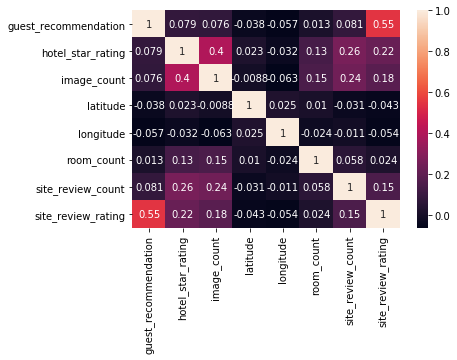

In [6]:
sns.heatmap(corr_mat, annot=True)

In [7]:
indian_hotels.columns

Index(['additional_info', 'address', 'area', 'city', 'country', 'crawl_date',
       'guest_recommendation', 'hotel_brand', 'hotel_category',
       'hotel_description', 'hotel_facilities', 'hotel_star_rating',
       'image_count', 'latitude', 'locality', 'longitude', 'pageurl',
       'point_of_interest', 'property_id', 'property_name', 'property_type',
       'province', 'qts', 'query_time_stamp', 'review_count_by_category',
       'room_area', 'room_count', 'room_facilities', 'room_type',
       'similar_hotel', 'site_review_count', 'site_review_rating',
       'site_stay_review_rating', 'sitename', 'state', 'uniq_id'],
      dtype='object')

###### Understand the data a bit more!

In [8]:
indian_hotels[['locality', 'point_of_interest', 'hotel_facilities', 'property_type', 'province', 'qts', 'room_facilities', 'room_type', 'state']].head()

,locality,point_of_interest,hotel_facilities,property_type,province,qts,room_facilities,room_type,state
0,Others,Hadimba Temple|Naggar Village|Himalayan Nyingm...,Doctor on Call|Dry Cleaning|Laundry Service Av...,Resort,Manali,2016-07-24 01:12:30 +0000,Room Service |Basic Bathroom Amenities|Cable /...,Deluxe Room,Himachal Pradesh
1,Sushant Lok,Sushant Lok|Sahara Mall|Amity International Sc...,Airport Transfer Available / Surcharge|Banquet...,Guest House,Gurgaon,2016-07-24 01:12:30 +0000,Room Service |Air Conditioning |Basic Bathroom...,Deluxe Room With Free WIFI,Haryana
2,Calangute Area,"Anjuna Beach|Calangute Beach|Titos lane, baga|...",Swimming Pool|Bar / Lounge |Laundry Service Av...,Resort,Goa,2016-07-24 01:12:30 +0000,Room Service |Air Conditioning |Cable / Satell...,Standard Room,Goa
3,Village Simsa,The Mall|Tibetian Monastery|Vashisht Hot Baths...,Doctor on Call|Dry Cleaning|Laundry Service Av...,Cottage,Manali,2016-07-24 01:12:30 +0000,Basic Bathroom Amenities|Cable / Satellite / P...,Deluxe Room,Himachal Pradesh
4,Paharganj,Gaffar Market|YMCA Institute|Agrasen Boali|Cha...,Internet Access - Surcharge|Laundry Service Av...,Hotel,Delhi,2016-07-24 01:12:30 +0000,Basic Bathroom Amenities|Cable / Satellite / P...,Standard Room Non AC,Delhi


In [9]:
indian_hotels.property_type.value_counts()

Hotel                2314
Resort                516
Guest House           243
Homestay              231
Service Apartment     183
Lodge                 117
Houseboat              78
Cottage                75
Tent                   57
BnB                    49
Villa                  49
Bungalow               46
Palace                 11
Hostel                 10
Motel                   9
Farm Stay               7
Luxury Yacht            3
Beach Hut               2
Name: property_type, dtype: int64

In [10]:
indian_hotels['state'] = indian_hotels.state.str.title()
#indian_hotels.state.value_counts(sort=True)

In [11]:
indian_hotels.state.value_counts()

Maharashtra                    457
Karnataka                      373
Kerala                         348
Rajasthan                      329
Tamil Nadu                     272
Himachal Pradesh               222
Goa                            222
Uttarakhand                    203
Uttar Pradesh                  178
Andhra Pradesh                 167
Madhya Pradesh                 159
Gujarat                        155
Haryana                        150
West Bengal                    144
Delhi                          137
Jammu And Kashmir              125
Punjab                          87
Sikkim                          63
Orissa                          44
Bihar                           34
Jharkhand                       28
Assam                           22
Andaman And Nicobar Islands     21
Chhattisgarh                    20
Pondicherry                     14
Meghalaya                        9
Dadra And Nagar Haveli           4
Nagaland                         4
Mizoram             

In [12]:
indian_hotels.room_type.value_counts()

Deluxe Room                                                   683
Standard Room                                                 366
Deluxe                                                         98
Executive Room                                                 90
Super Deluxe Room                                              81
Standard                                                       44
Superior Room                                                  44
AC Room                                                        38
Suite Room                                                     36
STANDARD ROOM                                                  35
Premium Room                                                   31
Deluxe room                                                    31
Deluxe AC Room                                                 30
Ac Room                                                        29
Luxury Room                                                    28
Standard r

In [89]:
indian_hotels_concat.hotel_facilities.head()

0    Doctor on Call|Dry Cleaning|Laundry Service Av...
1    Airport Transfer Available / Surcharge|Banquet...
2    Swimming Pool|Bar / Lounge |Laundry Service Av...
3    Doctor on Call|Dry Cleaning|Laundry Service Av...
4    Internet Access - Surcharge|Laundry Service Av...
Name: hotel_facilities, dtype: object

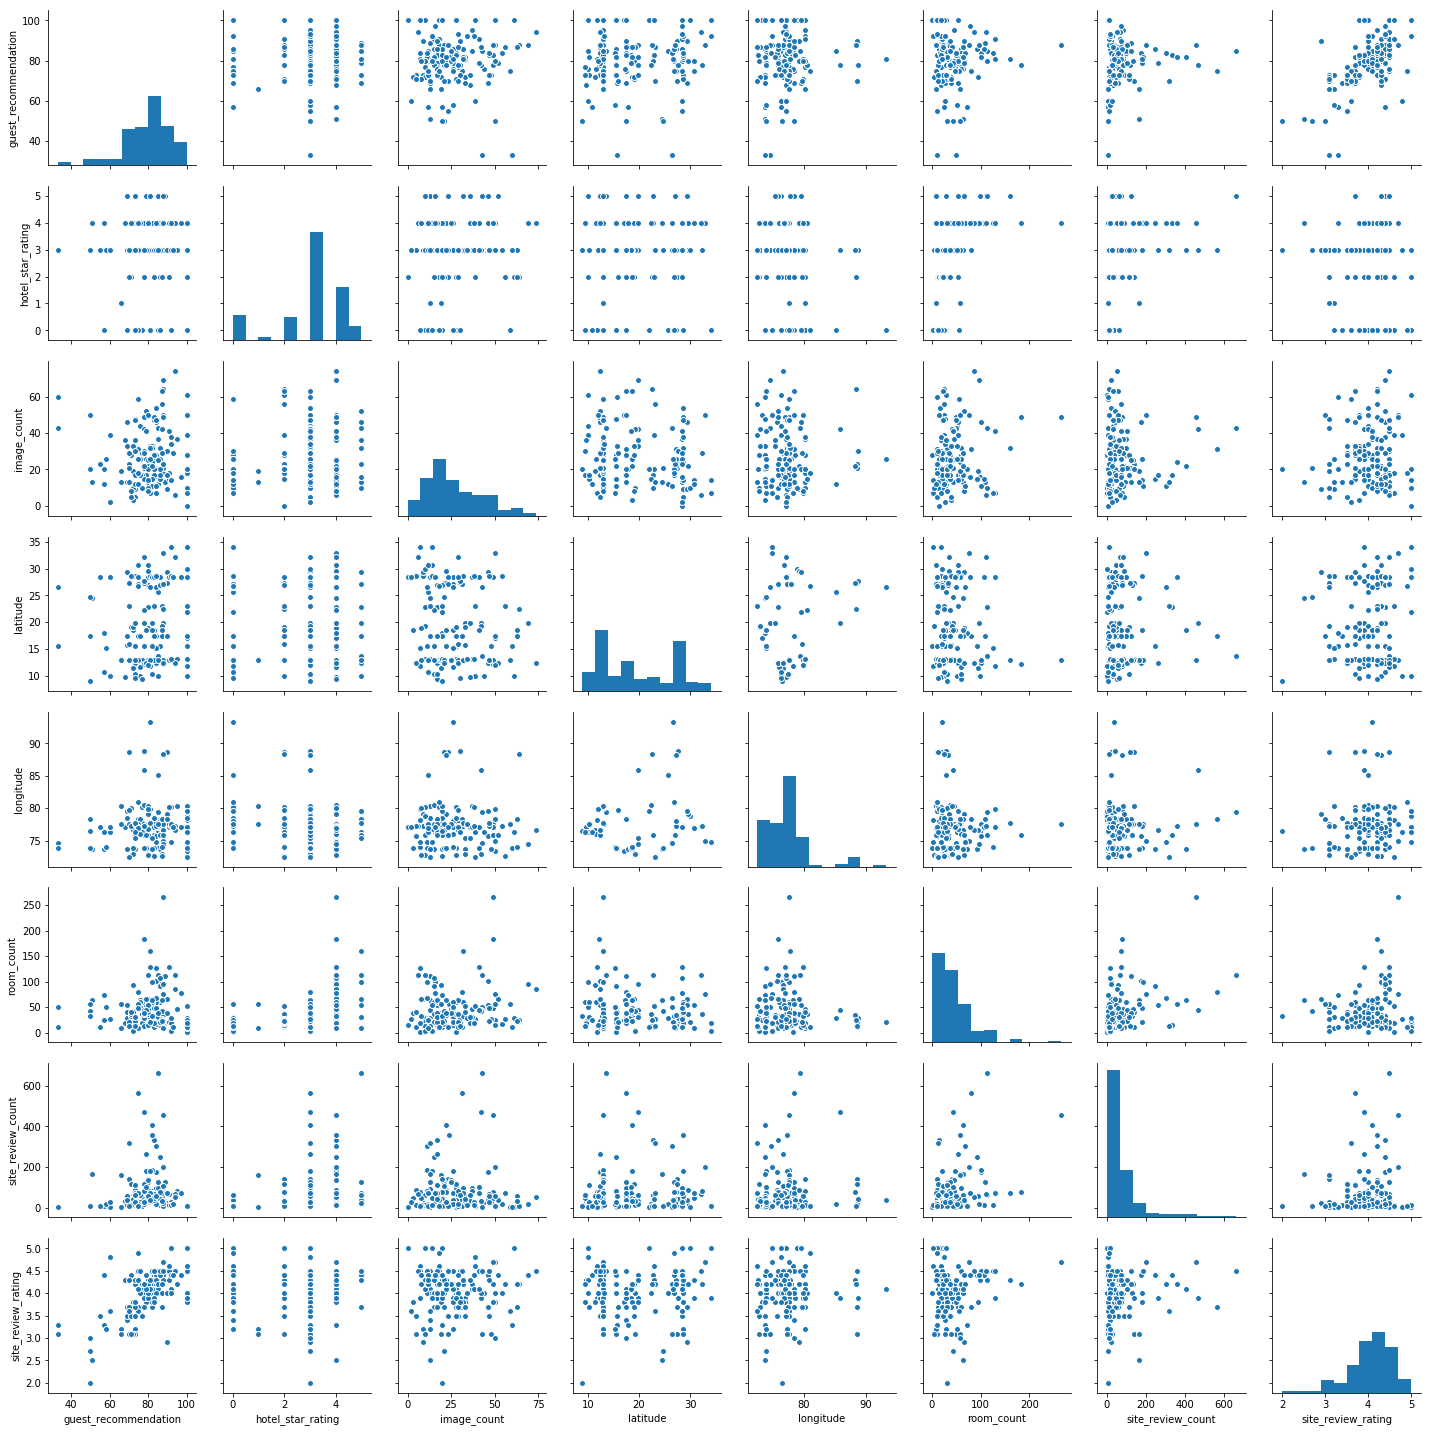

In [13]:
sns.pairplot(indian_hotels.dropna())

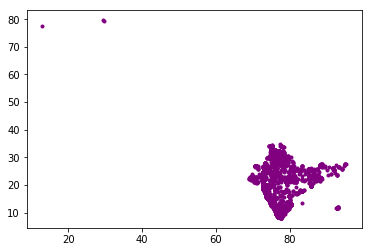

In [14]:
import matplotlib.pyplot as plt
plt.scatter(indian_hotels['longitude'], indian_hotels['latitude'], marker='.', color="purple")

In [15]:
indian_hotels[indian_hotels['longitude'] < 60 ]

,additional_info,address,area,city,country,crawl_date,guest_recommendation,hotel_brand,hotel_category,hotel_description,...,room_count,room_facilities,room_type,similar_hotel,site_review_count,site_review_rating,site_stay_review_rating,sitename,state,uniq_id
730,NaN,"Nathuakhan, Nainital",Others,Nainital,India,2016-08-07,NaN,NaN,regular,The standard check-in time is 12:30 PM and the...,...,4,Room Service |Alarm Clock|Ceiling Fan|Attached...,Front Valley &amp; Hill View Room,https://www.goibibo.com/hotels/prim-resorts---...,NaN,NaN,Service Quality::|Amenities::|Food and Drinks:...,goibibo,Uttarakhand,2da19ad959cc4029e6489baa1b716633
1001,Room Service|Free Internet,"#79,DVG Road Basavangudi (Next to Upahara Dars...",Jayanagar,Bangalore,India,2016-07-03,78.0,NaN,regular,The standard check-in time is 12:00 PM and the...,...,41,Basic Bathroom Amenities|Telephone| Hot / Cold...,Standard Non A/c,NaN,61.0,3.4,Service Quality::3.3|Amenities::3.3|Food and D...,goibibo,Karnataka,13e9c113a60f50694e0550df6b92949f
3554,Room Service|Internet Access|Gym/Spa|Restaurant,"Kalika Estate, Dadgallia, Ranikhet",Almora Ranikhet Road,Ranikhet,India,2016-08-21,100.0,WelcomHeritage,regular,The standard check-in time is 12:00 PM and the...,...,25,Balcony / Terrace|Basic Bathroom Amenities|Cab...,Deluxe Room,https://www.goibibo.com/hotels/ranikhet-inn-ho...,14.0,4.1,Service Quality::3.9|Amenities::4.0|Food and D...,goibibo,Uttarakhand,73dd49c6ec0e3cb03b6c1d34a2a17bea


In [16]:
indian_hotels_filtered = indian_hotels[indian_hotels['longitude'] > 60 ]

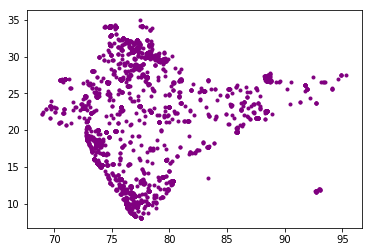

In [17]:
plt.scatter(indian_hotels_filtered['longitude'], indian_hotels_filtered['latitude'], marker='.', color="purple")

*From above map, the data is a good representation of the Indian regions.*

In [99]:
indian_hotels.site_review_rating.kurt(skipna=True)

1.966481043201593

#### Feature engineering for specific ratings

In [18]:
indian_hotels['additional_info'].head()

0    Room Service|Internet Access|Restaurant|Free I...
1                                 Room Service|Gym/Spa
2                             Restaurant|Swimming Pool
3                                                  NaN
4                           Internet Access|Restaurant
Name: additional_info, dtype: object

In [19]:
amenities = indian_hotels['additional_info'].str.split('|',expand=True)

In [20]:
stay_review_rating = indian_hotels['site_stay_review_rating'].str.split('|', expand=True)

In [21]:
stay_review_rating.head()

,0,1,2,3,4,5
0,Service Quality::3.9,Amenities::3.7,Food and Drinks::3.8,Value for Money::4.1,Location::4.0,Cleanliness::4.1
1,Service Quality::4.7,Amenities::4.7,Food and Drinks::4.3,Value for Money::4.7,Location::4.8,Cleanliness::4.8
2,Service Quality::2.5,Amenities::2.5,Food and Drinks::1.0,Value for Money::2.5,Location::2.5,Cleanliness::1.0
3,Service Quality::5.0,Amenities::5.0,Food and Drinks::5.0,Value for Money::5.0,Location::5.0,Cleanliness::5.0
4,Service Quality::2.7,Amenities::2.6,Food and Drinks::2.5,Value for Money::2.9,Location::2.9,Cleanliness::2.6


In [22]:
stay_review_rating = stay_review_rating.rename(index = str, columns={0:"Service_Quality", 1: "Amenities", 2: "Food_and_Drinks", 3: "Value_for_Money", 4: "Location", 5: "Cleaniness"})

In [23]:
stay_review_rating.columns[0]

'Service_Quality'

In [24]:
stay_review_rating['Service_Quality'] = stay_review_rating['Service_Quality'].str.split('::').str[-1]
stay_review_rating['Amenities'] = stay_review_rating['Amenities'].str.split('::').str[-1]
stay_review_rating['Food_and_Drinks'] = stay_review_rating['Food_and_Drinks'].str.split('::').str[-1]
stay_review_rating['Value_for_Money'] = stay_review_rating['Value_for_Money'].str.split('::').str[-1]
stay_review_rating['Location'] = stay_review_rating['Location'].str.split('::').str[-1]
stay_review_rating['Cleaniness'] = stay_review_rating['Cleaniness'].str.split('::').str[-1]
stay_review_rating.head()

,Service_Quality,Amenities,Food_and_Drinks,Value_for_Money,Location,Cleaniness
0,3.9,3.7,3.8,4.1,4.0,4.1
1,4.7,4.7,4.3,4.7,4.8,4.8
2,2.5,2.5,1.0,2.5,2.5,1.0
3,5.0,5.0,5.0,5.0,5.0,5.0
4,2.7,2.6,2.5,2.9,2.9,2.6


In [25]:
stay_review_rating.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 6 columns):
Service_Quality    4000 non-null object
Amenities          4000 non-null object
Food_and_Drinks    4000 non-null object
Value_for_Money    4000 non-null object
Location           4000 non-null object
Cleaniness         4000 non-null object
dtypes: object(6)
memory usage: 218.8+ KB


In [26]:
stay_review_rating_clean = stay_review_rating.dropna().astype('float', errors='ignore') 
stay_review_rating_clean['Service_Quality'] = pd.to_numeric(stay_review_rating['Service_Quality'], errors='coerce')
stay_review_rating_clean['Amenities'] = pd.to_numeric(stay_review_rating['Amenities'], errors='coerce')
stay_review_rating_clean['Food_and_Drinks'] = pd.to_numeric(stay_review_rating['Food_and_Drinks'], errors='coerce')
stay_review_rating_clean['Value_for_Money'] = pd.to_numeric(stay_review_rating['Value_for_Money'], errors='coerce')
stay_review_rating_clean['Location'] = pd.to_numeric(stay_review_rating['Location'], errors='coerce')
stay_review_rating_clean['Cleaniness'] = pd.to_numeric(stay_review_rating['Cleaniness'], errors='coerce')


In [27]:
stay_review_rating_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 6 columns):
Service_Quality    2416 non-null float64
Amenities          2416 non-null float64
Food_and_Drinks    2416 non-null float64
Value_for_Money    2416 non-null float64
Location           2416 non-null float64
Cleaniness         2416 non-null float64
dtypes: float64(6)
memory usage: 218.8+ KB


In [28]:
stay_review_rating_clean.head()

,Service_Quality,Amenities,Food_and_Drinks,Value_for_Money,Location,Cleaniness
0,3.9,3.7,3.8,4.1,4.0,4.1
1,4.7,4.7,4.3,4.7,4.8,4.8
2,2.5,2.5,1.0,2.5,2.5,1.0
3,5.0,5.0,5.0,5.0,5.0,5.0
4,2.7,2.6,2.5,2.9,2.9,2.6


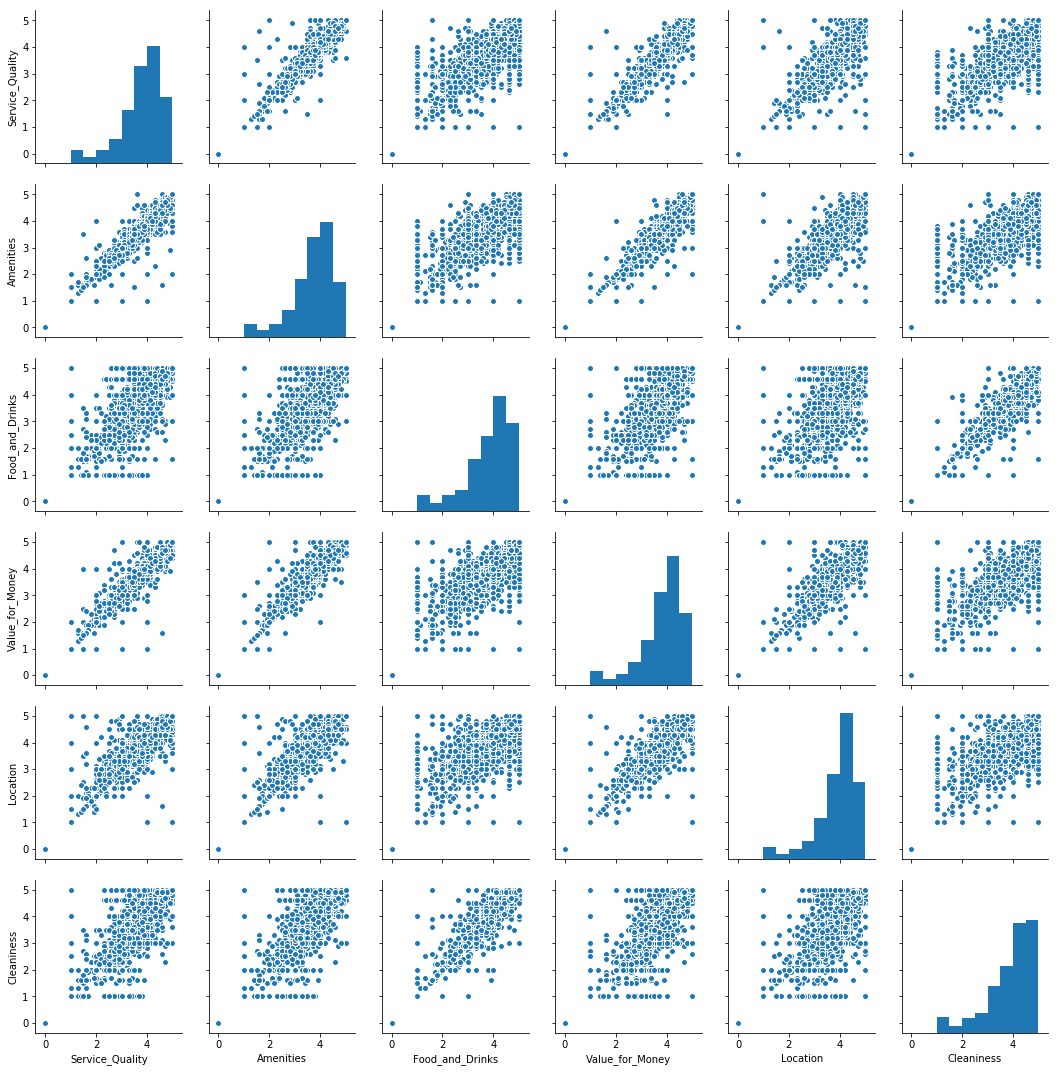

In [29]:
sns.pairplot(stay_review_rating_clean.dropna())

#### Feature engineering for Amenities

In [30]:
import itertools

hotels = indian_hotels

top_amenities = pd.Series(
    list(itertools.chain(*hotels['room_facilities']\
                             .fillna("")\
                             .map(lambda f: [am.strip() for am in f.split("|")])\
                             .values\
                             .tolist()))).value_counts().head(12).index.values
temp = hotels.assign(amenities=hotels['room_facilities'].fillna("").map(
        lambda f: [am.strip() for am in f.split("|")]))

for amenity in top_amenities:
    temp[amenity] = temp.amenities.map(lambda l: amenity in l)

In [31]:
temp.columns

Index(['additional_info', 'address', 'area', 'city', 'country', 'crawl_date',
       'guest_recommendation', 'hotel_brand', 'hotel_category',
       'hotel_description', 'hotel_facilities', 'hotel_star_rating',
       'image_count', 'latitude', 'locality', 'longitude', 'pageurl',
       'point_of_interest', 'property_id', 'property_name', 'property_type',
       'province', 'qts', 'query_time_stamp', 'review_count_by_category',
       'room_area', 'room_count', 'room_facilities', 'room_type',
       'similar_hotel', 'site_review_count', 'site_review_rating',
       'site_stay_review_rating', 'sitename', 'state', 'uniq_id', 'amenities',
       'Room Service', 'Basic Bathroom Amenities', 'Hot / Cold Running Water',
       'Housekeeping', 'Ceiling Fan', 'Air Conditioning',
       'Cable / Satellite / Pay TV available', 'Attached Bathroom',
       'Telephone', 'Mirror', 'TV', 'Desk in Room'],
      dtype='object')

In [32]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 49 columns):
additional_info                         3192 non-null object
address                                 4000 non-null object
area                                    3965 non-null object
city                                    4000 non-null object
country                                 4000 non-null object
crawl_date                              4000 non-null object
guest_recommendation                    2416 non-null float64
hotel_brand                             389 non-null object
hotel_category                          4000 non-null object
hotel_description                       3983 non-null object
hotel_facilities                        3806 non-null object
hotel_star_rating                       4000 non-null int64
image_count                             4000 non-null int64
latitude                                4000 non-null float64
locality                                

In [33]:
temp.head()

,additional_info,address,area,city,country,crawl_date,guest_recommendation,hotel_brand,hotel_category,hotel_description,...,Hot / Cold Running Water,Housekeeping,Ceiling Fan,Air Conditioning,Cable / Satellite / Pay TV available,Attached Bathroom,Telephone,Mirror,TV,Desk in Room
0,Room Service|Internet Access|Restaurant|Free I...,"15th Mile, N.H.21,Manali, District Kullu,Himac...",Others,Manali,India,2016-07-24,85.0,NaN,gostays,The standard check-in time is 12:00 PM and the...,...,True,True,True,False,True,True,True,True,True,True
1,Room Service|Gym/Spa,"A-585, Sushant Lok-1 ,Near Iffco Chowk Metro S...",Sushant Lok,Gurgaon,India,2016-07-24,87.0,NaN,regular,The standard check-in time is 12:00 PM and the...,...,True,True,True,True,True,True,True,True,True,False
2,Restaurant|Swimming Pool,"Cobra Vaddo,Calungate Baga Road, Bardez, Calan...",Calangute Area,Goa,India,2016-07-24,50.0,NaN,regular,The standard check-in time is 12:00 PM and the...,...,True,True,True,True,True,True,True,True,False,True
3,NaN,Simsa,Village Simsa,Manali,India,2016-07-24,100.0,NaN,regular,The standard check-in time is 12:00 PM and the...,...,True,False,False,False,True,False,True,False,False,False
4,Internet Access|Restaurant,"8180 Street No.-6,Arakashan Road,Paharganj",Paharganj,Delhi,India,2016-07-24,63.0,NaN,regular,The standard check-in time is 12:00 PM and the...,...,True,False,False,False,True,False,True,True,False,False


In [34]:
list(itertools.chain(*hotels['room_facilities']\
                             .fillna("")\
                             .map(lambda f: [am.strip() for am in f.split("|")])\
                             .values\
                             .tolist()))

['Room Service',
 'Basic Bathroom Amenities',
 'Cable / Satellite / Pay TV available',
 'Ceiling Fan',
 'Heating Facility (on request)',
 'Internet Connection In Room',
 'Telephone',
 'Shower Facility Available',
 'Breakfast Available (surcharge)',
 'Hot / Cold Running Water',
 'Housekeeping',
 'Desk in Room',
 'Extra Bed, Towels, Linens, Bedding (on request)',
 'Window Opens',
 'Makeup / Shaving Mirror',
 'Safe - In - Room',
 'Hill View from all Rooms',
 'HD / LCD Satellite TV',
 'Sofa Table / Extra Seats',
 'Private Garden',
 'TV',
 'Bathrobes',
 'Mirror',
 'Gas Cylinder - Chargeable',
 'Luggage Rack',
 'Attached Bathroom',
 'Bedside Table',
 'Clothes Hook in Bathroom',
 'Complete Bedding',
 'Daily Room Cleaning',
 'Dustbins',
 'Extra Toilteries on Demand',
 'Modern Toilet Facilities',
 'Room Door Fitted with Lock and Key',
 'Room with Window/Ventilation',
 'Rooms with Attached Bathrooms',
 'Sufficient Lighting',
 'Western Toilet Seat',
 'Breakfast chargeable',
 'Room Service',
 'Air

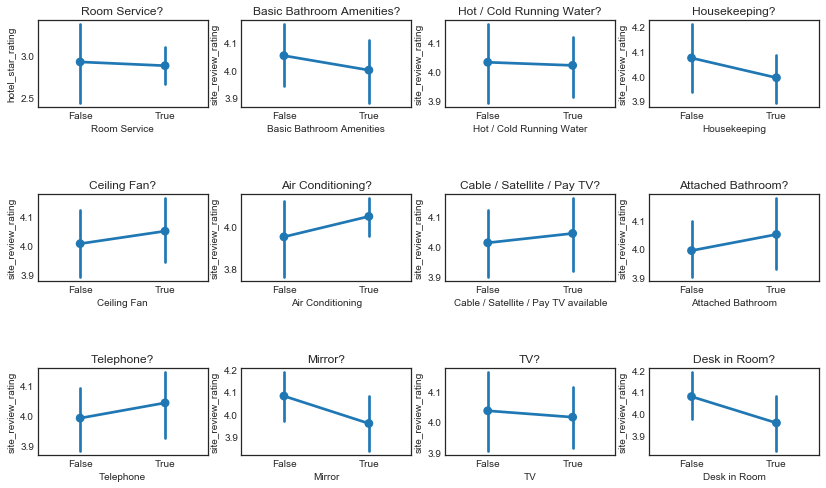

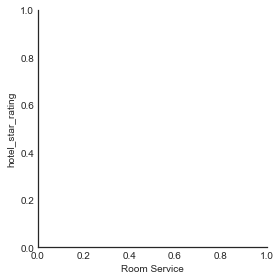

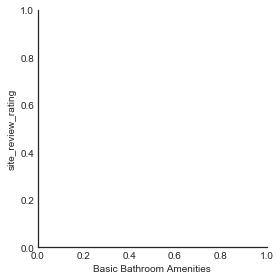

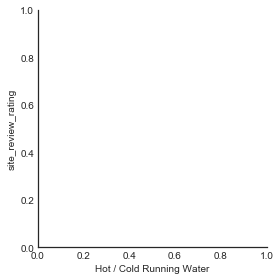

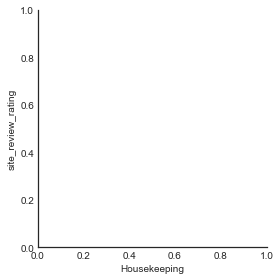

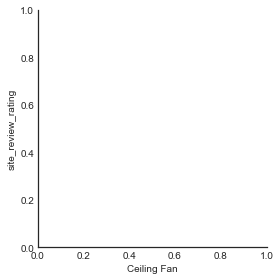

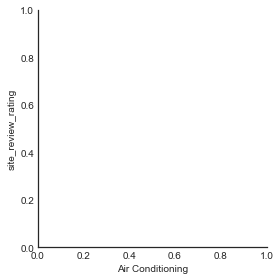

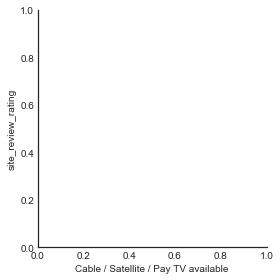

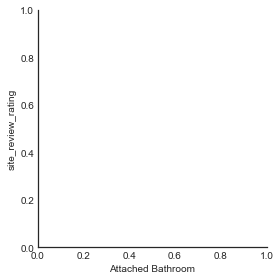

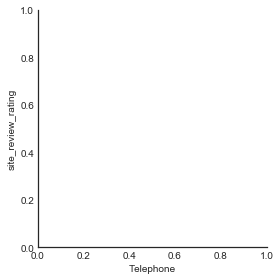

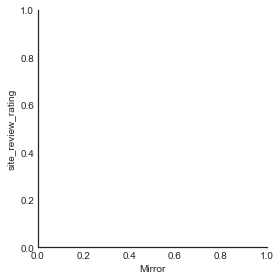

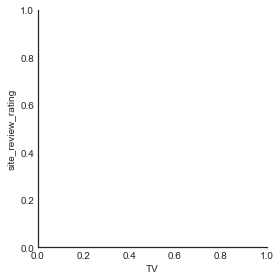

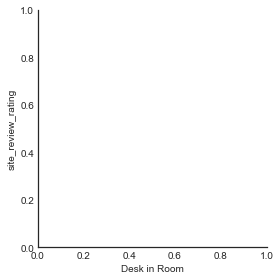

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

f, axarr = plt.subplots(3, 4, figsize=(14, 8))
f.subplots_adjust(hspace=1)

sns.factorplot(x='Room Service', y='hotel_star_rating', data=temp.dropna(), ax=axarr[0][0])
axarr[0][0].set_title("Room Service?")

sns.factorplot(x='Basic Bathroom Amenities', y='site_review_rating', 
               data=temp.dropna(), ax=axarr[0][1])
axarr[0][1].set_title("Basic Bathroom Amenities?")

sns.factorplot(x='Hot / Cold Running Water', y='site_review_rating', 
               data=temp.dropna(), ax=axarr[0][2])
axarr[0][2].set_title("Hot / Cold Running Water?")

sns.factorplot(x='Housekeeping', y='site_review_rating', 
               data=temp.dropna(), ax=axarr[0][3])
axarr[0][3].set_title("Housekeeping?")

sns.factorplot(x='Ceiling Fan', y='site_review_rating', 
               data=temp.dropna(), ax=axarr[1][0])
axarr[1][0].set_title("Ceiling Fan?")

sns.factorplot(x='Air Conditioning', y='site_review_rating', 
               data=temp.dropna(), ax=axarr[1][1])
axarr[1][1].set_title("Air Conditioning?")

sns.factorplot(x='Cable / Satellite / Pay TV available', y='site_review_rating', 
               data=temp.dropna(), ax=axarr[1][2])
axarr[1][2].set_title("Cable / Satellite / Pay TV?")

sns.factorplot(x='Attached Bathroom', y='site_review_rating', 
               data=temp.dropna(), ax=axarr[1][3])
axarr[1][3].set_title("Attached Bathroom?")

sns.factorplot(x='Telephone', y='site_review_rating', 
               data=temp.dropna(), ax=axarr[2][0])
axarr[2][0].set_title("Telephone?")

sns.factorplot(x='Mirror', y='site_review_rating', 
               data=temp.dropna(), ax=axarr[2][1])
axarr[2][1].set_title("Mirror?")

sns.factorplot(x='TV', y='site_review_rating', 
               data=temp.dropna(), ax=axarr[2][2])
axarr[2][2].set_title("TV?")

sns.factorplot(x='Desk in Room', y='site_review_rating', 
               data=temp.dropna(), ax=axarr[2][3])
axarr[2][3].set_title("Desk in Room?")

import matplotlib.pyplot as plt
f.savefig('amenities_corr_to_rating.png')

![Image of Amenities](amenities_corr_to_rating.png)

In [36]:
stay_review_rating_clean.head()

,Service_Quality,Amenities,Food_and_Drinks,Value_for_Money,Location,Cleaniness
0,3.9,3.7,3.8,4.1,4.0,4.1
1,4.7,4.7,4.3,4.7,4.8,4.8
2,2.5,2.5,1.0,2.5,2.5,1.0
3,5.0,5.0,5.0,5.0,5.0,5.0
4,2.7,2.6,2.5,2.9,2.9,2.6


In [37]:
indian_hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 36 columns):
additional_info             3192 non-null object
address                     4000 non-null object
area                        3965 non-null object
city                        4000 non-null object
country                     4000 non-null object
crawl_date                  4000 non-null object
guest_recommendation        2416 non-null float64
hotel_brand                 389 non-null object
hotel_category              4000 non-null object
hotel_description           3983 non-null object
hotel_facilities            3806 non-null object
hotel_star_rating           4000 non-null int64
image_count                 4000 non-null int64
latitude                    4000 non-null float64
locality                    3965 non-null object
longitude                   4000 non-null float64
pageurl                     4000 non-null object
point_of_interest           3760 non-null object
property_id

In [38]:
indian_hotels.reset_index(drop=True, inplace=True)
indian_hotels.head()

,additional_info,address,area,city,country,crawl_date,guest_recommendation,hotel_brand,hotel_category,hotel_description,...,room_count,room_facilities,room_type,similar_hotel,site_review_count,site_review_rating,site_stay_review_rating,sitename,state,uniq_id
0,Room Service|Internet Access|Restaurant|Free I...,"15th Mile, N.H.21,Manali, District Kullu,Himac...",Others,Manali,India,2016-07-24,85.0,NaN,gostays,The standard check-in time is 12:00 PM and the...,...,17,Room Service |Basic Bathroom Amenities|Cable /...,Deluxe Room,https://www.goibibo.com/hotels/woodchime-homes...,87.0,4.0,Service Quality::3.9|Amenities::3.7|Food and D...,goibibo,Himachal Pradesh,2c8db027d43a9452a43e88eb30d9f983
1,Room Service|Gym/Spa,"A-585, Sushant Lok-1 ,Near Iffco Chowk Metro S...",Sushant Lok,Gurgaon,India,2016-07-24,87.0,NaN,regular,The standard check-in time is 12:00 PM and the...,...,18,Room Service |Air Conditioning |Basic Bathroom...,Deluxe Room With Free WIFI,https://www.goibibo.com/hotels/stepinn-iffco-c...,8.0,4.5,Service Quality::4.7|Amenities::4.7|Food and D...,goibibo,Haryana,e98f69f889c0235e6dc480e7df6de0de
2,Restaurant|Swimming Pool,"Cobra Vaddo,Calungate Baga Road, Bardez, Calan...",Calangute Area,Goa,India,2016-07-24,50.0,NaN,regular,The standard check-in time is 12:00 PM and the...,...,15,Room Service |Air Conditioning |Cable / Satell...,Standard Room,https://www.goibibo.com/hotels/sunrise-beach-r...,2.0,2.5,Service Quality::2.5|Amenities::2.5|Food and D...,goibibo,Goa,9b59d00eaffc273d83000ed7dcda0e83
3,NaN,Simsa,Village Simsa,Manali,India,2016-07-24,100.0,NaN,regular,The standard check-in time is 12:00 PM and the...,...,24,Basic Bathroom Amenities|Cable / Satellite / P...,Deluxe Room,https://www.goibibo.com/hotels/green-cottages-...,1.0,5.0,Service Quality::5.0|Amenities::5.0|Food and D...,goibibo,Himachal Pradesh,df0971f9c5501af112485ee28b468ce5
4,Internet Access|Restaurant,"8180 Street No.-6,Arakashan Road,Paharganj",Paharganj,Delhi,India,2016-07-24,63.0,NaN,regular,The standard check-in time is 12:00 PM and the...,...,20,Basic Bathroom Amenities|Cable / Satellite / P...,Standard Room Non AC,https://www.goibibo.com/hotels/delhi-continent...,121.0,2.8,Service Quality::2.7|Amenities::2.6|Food and D...,goibibo,Delhi,0c3514344c9cda8718f558e84bdb44ef


In [39]:
stay_review_rating.reset_index(drop=True, inplace=True)
stay_review_rating.head()

,Service_Quality,Amenities,Food_and_Drinks,Value_for_Money,Location,Cleaniness
0,3.9,3.7,3.8,4.1,4.0,4.1
1,4.7,4.7,4.3,4.7,4.8,4.8
2,2.5,2.5,1.0,2.5,2.5,1.0
3,5.0,5.0,5.0,5.0,5.0,5.0
4,2.7,2.6,2.5,2.9,2.9,2.6


In [40]:
indian_hotels_concat = pd.concat([temp,stay_review_rating], axis=1)

In [41]:
indian_hotels_concat.head()

,additional_info,address,area,city,country,crawl_date,guest_recommendation,hotel_brand,hotel_category,hotel_description,...,Telephone,Mirror,TV,Desk in Room,Service_Quality,Amenities,Food_and_Drinks,Value_for_Money,Location,Cleaniness
0,Room Service|Internet Access|Restaurant|Free I...,"15th Mile, N.H.21,Manali, District Kullu,Himac...",Others,Manali,India,2016-07-24,85.0,NaN,gostays,The standard check-in time is 12:00 PM and the...,...,True,True,True,True,3.9,3.7,3.8,4.1,4.0,4.1
1,Room Service|Gym/Spa,"A-585, Sushant Lok-1 ,Near Iffco Chowk Metro S...",Sushant Lok,Gurgaon,India,2016-07-24,87.0,NaN,regular,The standard check-in time is 12:00 PM and the...,...,True,True,True,False,4.7,4.7,4.3,4.7,4.8,4.8
2,Restaurant|Swimming Pool,"Cobra Vaddo,Calungate Baga Road, Bardez, Calan...",Calangute Area,Goa,India,2016-07-24,50.0,NaN,regular,The standard check-in time is 12:00 PM and the...,...,True,True,False,True,2.5,2.5,1.0,2.5,2.5,1.0
3,NaN,Simsa,Village Simsa,Manali,India,2016-07-24,100.0,NaN,regular,The standard check-in time is 12:00 PM and the...,...,True,False,False,False,5.0,5.0,5.0,5.0,5.0,5.0
4,Internet Access|Restaurant,"8180 Street No.-6,Arakashan Road,Paharganj",Paharganj,Delhi,India,2016-07-24,63.0,NaN,regular,The standard check-in time is 12:00 PM and the...,...,True,True,False,False,2.7,2.6,2.5,2.9,2.9,2.6


In [42]:
indian_hotels_concat.tail()

,additional_info,address,area,city,country,crawl_date,guest_recommendation,hotel_brand,hotel_category,hotel_description,...,Telephone,Mirror,TV,Desk in Room,Service_Quality,Amenities,Food_and_Drinks,Value_for_Money,Location,Cleaniness
3995,Room Service,"Vijayvargiya Tower,Tower Chowk, Ujjain (M.P.)",Freeganj Area,Ujjain,India,2016-06-26,NaN,NaN,regular,The standard check-in time is 12:00 PM and the...,...,False,False,False,False,,,,,,
3996,Room Service,"Anjali Circle ,Opposite Petrol Pump,Vasna Road",Ellis Bridge Area,Ahmedabad,India,2016-06-26,NaN,NaN,regular,The standard check-in time is 02:00 PM and the...,...,True,True,True,True,,,,,,
3997,Room Service|Restaurant,"Marol Maroshi Road, Near To Marol naka FireBri...",Andheri,Mumbai,India,2016-06-26,83.0,NaN,regular,The standard check-in time is 12:00 PM and the...,...,True,True,False,False,3.9,3.8,4.0,4.0,4.0,4.2
3998,Room Service,"Station Road, B Deoghar Ho, Deoghar Jharkhand",Railway Station Road,Deoghar,India,2016-06-26,NaN,NaN,regular,The standard check-in time is 02:00 PM and the...,...,False,False,False,False,,,,,,
3999,Room Service|Restaurant,"N.H 6, A.Katapali, Near Gosala",Katapali,Sambalpur,India,2016-06-26,50.0,NaN,regular,The standard check-in time is 10:00 AM and the...,...,False,False,False,True,4.3,4.3,4.3,4.3,4.3,4.3


In [43]:
indian_hotels_concat['Service_Quality'] = pd.to_numeric(indian_hotels_concat['Service_Quality'], errors='coerce')
indian_hotels_concat['Amenities'] = pd.to_numeric(indian_hotels_concat['Amenities'], errors='coerce')
indian_hotels_concat['Food_and_Drinks'] = pd.to_numeric(indian_hotels_concat['Food_and_Drinks'], errors='coerce')
indian_hotels_concat['Value_for_Money'] = pd.to_numeric(indian_hotels_concat['Value_for_Money'], errors='coerce')
indian_hotels_concat['Location'] = pd.to_numeric(indian_hotels_concat['Location'], errors='coerce')
indian_hotels_concat['Cleaniness'] = pd.to_numeric(indian_hotels_concat['Cleaniness'], errors='coerce')

###### Predict the overall rating based on individual ratings (post-review factors)

In [44]:
ratings = indian_hotels_concat[['site_review_rating', 'Service_Quality', 'Amenities', 'Food_and_Drinks','Value_for_Money','Location', 'Cleaniness']]

In [45]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 7 columns):
site_review_rating    2416 non-null float64
Service_Quality       2416 non-null float64
Amenities             2416 non-null float64
Food_and_Drinks       2416 non-null float64
Value_for_Money       2416 non-null float64
Location              2416 non-null float64
Cleaniness            2416 non-null float64
dtypes: float64(7)
memory usage: 218.8 KB


In [46]:
ratings_corr_mat = ratings.corr()

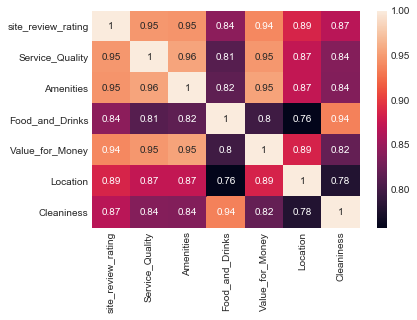

In [47]:
sns.heatmap(ratings_corr_mat, annot=True)

*From the heatmap above, the ratings have high correlation with each other. This does seem to line up with the expecation that customers do give high ratings to all categories iff they are overall pleased with the hotel.*

In [48]:
from statsmodels.formula.api import ols
model = ols(" site_review_rating ~ Service_Quality", data=ratings.dropna()).fit()


In [49]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     site_review_rating   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                 2.134e+04
Date:                Tue, 15 May 2018   Prob (F-statistic):               0.00
Time:                        17:54:16   Log-Likelihood:                -252.52
No. Observations:                2416   AIC:                             509.0
Df Residuals:                    2414   BIC:                             520.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.3718      0.024     15.641      0.000       0.325       0.418
Service_Quality     0.9111      0.006    146.087      0.000       0.899       0.923
==============================================================================
Omnibus:                     1090.830   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            89340.480
Skew:                           1.231   Prob(JB):                         0.00
Kurtosis:                      32.689   Cond. No.                         17.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*The regression model underlies our expectation that customers are rating service quality very similar to the overall hotel rating.*

*The positive intercept underscores the residual impact of other factors that customers give even if service quality is poor.*

#### Predict hotel ratings from factors before review.

In [50]:
indian_hotels.hotel_category.value_counts()

regular    3871
gostays     129
Name: hotel_category, dtype: int64

In [51]:
#Map hotel category
category_map = {'regular':0, 'gostays':1}
indian_hotels_concat.replace({'hotel_category': category_map}, inplace=True)
#indian_hotels['hotel_category_val'] = indian_hotels.replace()

In [52]:
indian_hotels_concat.head()

,additional_info,address,area,city,country,crawl_date,guest_recommendation,hotel_brand,hotel_category,hotel_description,...,Telephone,Mirror,TV,Desk in Room,Service_Quality,Amenities,Food_and_Drinks,Value_for_Money,Location,Cleaniness
0,Room Service|Internet Access|Restaurant|Free I...,"15th Mile, N.H.21,Manali, District Kullu,Himac...",Others,Manali,India,2016-07-24,85.0,NaN,1,The standard check-in time is 12:00 PM and the...,...,True,True,True,True,3.9,3.7,3.8,4.1,4.0,4.1
1,Room Service|Gym/Spa,"A-585, Sushant Lok-1 ,Near Iffco Chowk Metro S...",Sushant Lok,Gurgaon,India,2016-07-24,87.0,NaN,0,The standard check-in time is 12:00 PM and the...,...,True,True,True,False,4.7,4.7,4.3,4.7,4.8,4.8
2,Restaurant|Swimming Pool,"Cobra Vaddo,Calungate Baga Road, Bardez, Calan...",Calangute Area,Goa,India,2016-07-24,50.0,NaN,0,The standard check-in time is 12:00 PM and the...,...,True,True,False,True,2.5,2.5,1.0,2.5,2.5,1.0
3,NaN,Simsa,Village Simsa,Manali,India,2016-07-24,100.0,NaN,0,The standard check-in time is 12:00 PM and the...,...,True,False,False,False,5.0,5.0,5.0,5.0,5.0,5.0
4,Internet Access|Restaurant,"8180 Street No.-6,Arakashan Road,Paharganj",Paharganj,Delhi,India,2016-07-24,63.0,NaN,0,The standard check-in time is 12:00 PM and the...,...,True,True,False,False,2.7,2.6,2.5,2.9,2.9,2.6


In [91]:
#Create state dummies as a proxy for regional bias in hotel ratings
state_dummies = pd.get_dummies(indian_hotels_concat.state)

In [55]:
state_dummies.head()

,Andaman And Nicobar Islands,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Dadra And Nagar Haveli,Delhi,Goa,Gujarat,...,Pondicherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
indian_hotels_concat = pd.concat([indian_hotels_concat, state_dummies], axis=1)

In [57]:
indian_hotels_concat.head()

,additional_info,address,area,city,country,crawl_date,guest_recommendation,hotel_brand,hotel_category,hotel_description,...,Pondicherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
0,Room Service|Internet Access|Restaurant|Free I...,"15th Mile, N.H.21,Manali, District Kullu,Himac...",Others,Manali,India,2016-07-24,85.0,NaN,1,The standard check-in time is 12:00 PM and the...,...,0,0,0,0,0,0,0,0,0,0
1,Room Service|Gym/Spa,"A-585, Sushant Lok-1 ,Near Iffco Chowk Metro S...",Sushant Lok,Gurgaon,India,2016-07-24,87.0,NaN,0,The standard check-in time is 12:00 PM and the...,...,0,0,0,0,0,0,0,0,0,0
2,Restaurant|Swimming Pool,"Cobra Vaddo,Calungate Baga Road, Bardez, Calan...",Calangute Area,Goa,India,2016-07-24,50.0,NaN,0,The standard check-in time is 12:00 PM and the...,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Simsa,Village Simsa,Manali,India,2016-07-24,100.0,NaN,0,The standard check-in time is 12:00 PM and the...,...,0,0,0,0,0,0,0,0,0,0
4,Internet Access|Restaurant,"8180 Street No.-6,Arakashan Road,Paharganj",Paharganj,Delhi,India,2016-07-24,63.0,NaN,0,The standard check-in time is 12:00 PM and the...,...,0,0,0,0,0,0,0,0,0,0


In [92]:
#Create property dummies as proxy for ratings givn to different hotel types
property_type_dummies = pd.get_dummies(indian_hotels_concat.property_type)

In [59]:
indian_hotels_concat = pd.concat([indian_hotels_concat, property_type_dummies], axis=1)

In [60]:
indian_hotels_concat.head()

,additional_info,address,area,city,country,crawl_date,guest_recommendation,hotel_brand,hotel_category,hotel_description,...,Hotel,Houseboat,Lodge,Luxury Yacht,Motel,Palace,Resort,Service Apartment,Tent,Villa
0,Room Service|Internet Access|Restaurant|Free I...,"15th Mile, N.H.21,Manali, District Kullu,Himac...",Others,Manali,India,2016-07-24,85.0,NaN,1,The standard check-in time is 12:00 PM and the...,...,0,0,0,0,0,0,1,0,0,0
1,Room Service|Gym/Spa,"A-585, Sushant Lok-1 ,Near Iffco Chowk Metro S...",Sushant Lok,Gurgaon,India,2016-07-24,87.0,NaN,0,The standard check-in time is 12:00 PM and the...,...,0,0,0,0,0,0,0,0,0,0
2,Restaurant|Swimming Pool,"Cobra Vaddo,Calungate Baga Road, Bardez, Calan...",Calangute Area,Goa,India,2016-07-24,50.0,NaN,0,The standard check-in time is 12:00 PM and the...,...,0,0,0,0,0,0,1,0,0,0
3,NaN,Simsa,Village Simsa,Manali,India,2016-07-24,100.0,NaN,0,The standard check-in time is 12:00 PM and the...,...,0,0,0,0,0,0,0,0,0,0
4,Internet Access|Restaurant,"8180 Street No.-6,Arakashan Road,Paharganj",Paharganj,Delhi,India,2016-07-24,63.0,NaN,0,The standard check-in time is 12:00 PM and the...,...,1,0,0,0,0,0,0,0,0,0


In [61]:
indian_hotels.columns

Index(['additional_info', 'address', 'area', 'city', 'country', 'crawl_date',
       'guest_recommendation', 'hotel_brand', 'hotel_category',
       'hotel_description', 'hotel_facilities', 'hotel_star_rating',
       'image_count', 'latitude', 'locality', 'longitude', 'pageurl',
       'point_of_interest', 'property_id', 'property_name', 'property_type',
       'province', 'qts', 'query_time_stamp', 'review_count_by_category',
       'room_area', 'room_count', 'room_facilities', 'room_type',
       'similar_hotel', 'site_review_count', 'site_review_rating',
       'site_stay_review_rating', 'sitename', 'state', 'uniq_id'],
      dtype='object')

In [93]:
#Create X,y
from sklearn.model_selection import train_test_split
data = indian_hotels_concat[['hotel_category', 'latitude', 'longitude', 'image_count', 'room_count', 'site_review_rating']]
data = pd.concat([data, state_dummies, property_type_dummies, temp.select_dtypes(include='bool')], axis=1)
data.dropna(inplace=True)
X = data.drop('site_review_rating', axis=1)
y = data['site_review_rating']


In [63]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2416 entries, 0 to 3999
Data columns (total 67 columns):
hotel_category                          2416 non-null int64
latitude                                2416 non-null float64
longitude                               2416 non-null float64
image_count                             2416 non-null int64
room_count                              2416 non-null int64
Andaman And Nicobar Islands             2416 non-null uint8
Andhra Pradesh                          2416 non-null uint8
Arunachal Pradesh                       2416 non-null uint8
Assam                                   2416 non-null uint8
Bihar                                   2416 non-null uint8
Chhattisgarh                            2416 non-null uint8
Dadra And Nagar Haveli                  2416 non-null uint8
Delhi                                   2416 non-null uint8
Goa                                     2416 non-null uint8
Gujarat                                 2416 non-

In [94]:
#Create train/test split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [95]:
#Scale the data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [67]:
columns = X_train.columns
X_train_std = ss.fit_transform(X_train[[name for name in columns]])

#### Model using Ridge regression

In [68]:
from sklearn import linear_model
ridge_model = linear_model.Ridge()
ridge_model.fit(X_train_std, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [69]:
ridge_model.score(X_train_std, y_train)

0.13209770515330255

In [70]:
ridge_model.coef_

array([ 0.06867017,  0.03996031,  0.02528245,  0.10418759,  0.00290677,
       -0.0153085 , -0.02927682,  0.        , -0.03366472, -0.0414596 ,
        0.00955164,  0.02116414, -0.05110486,  0.02945213,  0.01843103,
        0.01085669,  0.02956457,  0.05429106, -0.0159249 ,  0.02533306,
        0.07303045, -0.08342586, -0.01839145,  0.01492449,  0.        ,
        0.        , -0.0373637 ,  0.00813748, -0.03049458,  0.01988776,
        0.01843185,  0.03489766,  0.        ,  0.        , -0.04751876,
       -0.03046529, -0.0134833 ,  0.01909159,  0.00937973,  0.04024557,
        0.01848129, -0.0565148 , -0.0001579 ,  0.03514445, -0.00594988,
       -0.01805559,  0.04139778, -0.05926091,  0.        , -0.01896018,
       -0.01805826,  0.00483878,  0.0030029 ,  0.05169509, -0.01343765,
       -0.08291158, -0.05729149,  0.02184707,  0.07358374, -0.00446545,
        0.1275896 ,  0.00116797, -0.03572297,  0.00053282,  0.00787768,
        0.00876063,  0.0043947 ])

*Thats a very poor predictor for overall rating using Ridge regression*

#### Predict rating categories using Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
# As seen above during EDA, the rating distribution has positive kurtosis so need to give
# balanced weight to all classes
lgr = LogisticRegression(class_weight='balanced')

In [73]:
#lgr = LogisticRegression()

In [74]:
param_grid = [
    {'C': [C for C in [0.01, 0.1, 1, 10] ]  } ]

In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
grid = GridSearchCV(lgr, param_grid, cv = 5)

In [113]:
#For now doing a dummy categorization, might want to round these values later
y_train_categorized = y_train.astype('int32')

In [102]:
y_train_categorized.value_counts(sort=True)

4    852
3    645
2    169
1     78
5     67
0      1
Name: site_review_rating, dtype: int64

In [103]:
#Lets remove the 0 category due to its low count and set it to be category 1
y_train_categorized[y_train_categorized == 0 ] = 1

In [79]:
grid.fit(X_train_std, y_train_categorized)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': [0.01, 0.1, 1, 10]}], pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [80]:
from sklearn.metrics import classification_report, confusion_matrix

In [81]:
grid.score(X_train_std, y_train_categorized)

0.46467991169977924

In [82]:
predictions = grid.predict(X_train_std)
print(classification_report(y_train_categorized, predictions))

             precision    recall  f1-score   support

          1       0.21      0.58      0.31        79
          2       0.24      0.19      0.21       169
          3       0.50      0.36      0.42       645
          4       0.61      0.59      0.60       852
          5       0.17      0.42      0.24        67

avg / total       0.50      0.46      0.47      1812



In [83]:
confusion_matrix(y_train_categorized, predictions)

array([[ 46,   8,   9,   9,   7],
       [ 28,  32,  44,  54,  11],
       [ 69,  51, 232, 243,  50],
       [ 68,  37, 172, 504,  71],
       [  8,   6,  10,  15,  28]])

*The Logistic regression gives a much better result on training result.*

In [105]:
grid.best_estimator_

LogisticRegression(C=0.01, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [107]:
y_test_categorized = y_test.astype('int32')

In [108]:
y_test_categorized.value_counts(sort=True)

4    244
3    244
2     59
5     35
1     22
Name: site_review_rating, dtype: int64

In [110]:
X_test_std = ss.fit_transform(X_test[[name for name in columns]])

In [111]:
predictions_test = grid.predict(X_test_std)
print(classification_report(y_test_categorized, predictions_test))

             precision    recall  f1-score   support

          1       0.06      0.18      0.09        22
          2       0.10      0.08      0.09        59
          3       0.49      0.34      0.40       244
          4       0.52      0.57      0.54       244
          5       0.08      0.11      0.09        35

avg / total       0.42      0.39      0.40       604



In [112]:
confusion_matrix(y_test_categorized, predictions_test)

array([[  4,   5,   8,   4,   1],
       [ 14,   5,  19,  15,   6],
       [ 26,  22,  83,  97,  16],
       [ 18,  13,  51, 138,  24],
       [  6,   3,   9,  13,   4]])

In [ ]:
*

#### Q&A